<a href="https://colab.research.google.com/github/celamyrrha/analise_de_dados_CECIERJ/blob/main/Atividade_Semana14_Marcela_Myrrha_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Semana 14

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

In [2]:
# Instalando o pacote 'ipeadatapy'
!pip install ipeadatapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# CAPTURA DE DADOS
# (NAO ALTERE ESSE SCRIPT)

# Carregando pacotes
import pandas as pd
import ipeadatapy
import matplotlib.pyplot as plt

# Obtendo serie com dados sobre emplacamento de veículos
emplacamentos = ipeadatapy.timeseries('FENABRAVE12_VENDAUTO12')
emplacamentos.reset_index(inplace=True)
emplacamentos = emplacamentos.loc[(emplacamentos["DATE"] >= "2018-01-01") & (emplacamentos["DATE"] < "2023-01-01"), 
                                  "VALUE (Unidade)"]
emplacamentos.rename("emplacamentos", inplace=True)

# Obtendo serie com dados sobre IPI arrecadado sobre automóveis
ipi = ipeadatapy.timeseries('SRF12_IPIVEI12')
ipi.reset_index(inplace=True)
ipi = ipi.loc[(ipi["DATE"] >= "2018-01-01") & (ipi["DATE"] < "2023-01-01"), 
                                  "VALUE (R$)"]
ipi.rename("ipi", inplace=True)

carros = pd.concat([emplacamentos.reset_index(drop=True),
                    ipi.reset_index(drop=True)],
                   axis=1)
carros

,emplacamentos,ipi
0,149041.0,396.803197
1,129782.0,294.148084
2,172842.0,316.189768
3,178803.0,460.560847
4,164415.0,388.908702
5,163497.0,338.602563
6,176047.0,393.519599
7,203896.0,289.907467
8,173174.0,386.543268
9,208650.0,302.509132


###Questão 1

Dando continuidade usando os dados da AS12. Vamos relembrar o seguinte:

> O número de veículos emplacados (ou seja, veículos que foram comprados novos) funciona como um indicador econômico que demonstra o poder aquisitivo da população em geral. Estes dados também são úteis como indicadores de saúde, uma vez que, uma frota mais nova, polui menos o ar e o número de casos de doenças respiratórias em grandes centros é reduzido. 

> O Imposto sobre Produtos Industrializados, cuja sigla é IPI, é um imposto federal, ou seja, somente a União pode instituí-lo ou modificá-lo, sobre produtos industrializados no Brasil.

É possível utilizar uma regressão linear para estimar o `IPI` utilizando o `número de veículos emplacados`? Argumente utilizando alguma medida estatística para este fim.


In [4]:
# Questao 1
carros.corr()
 
#Dado o resultado da correlação no valor de 0,70, mostra que é possível usar a regressão linear nesse caso.



,emplacamentos,ipi
emplacamentos,1.00000,0.70685
ipi,0.70685,1.00000


###Questão 2

Crie uma base de `treinamento` e de `teste` para o ajuste de um modelo linear. Utilize 70% dos dados como conjunto de treinamento.


In [5]:
# Questao 2
from sklearn.model_selection import train_test_split

# Definindo conjunto de treino e teste simultaneamente
# Aqui, o conjunto de treino sera 70% dos dados
treino, teste = train_test_split(carros, 
                                 train_size = 0.70, 
                                 random_state = 123)
# random_state = 123 foi escolhido aleatoriamente
# use o numero que achar melhor 

print(treino.shape)
print(teste.shape)



(42, 2)
(18, 2)


###Questão 3

Treine o modelo linear utilizando a base de `treino`.

In [7]:
# Questao 3

import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(treino['emplacamentos'])
y_treino = treino['ipi']

# Definindo o modelo de regressao linear
reg = LinearRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino, 
                          y = y_treino)


###Questão 4

Avalie a `performance` do modelo estimado através do **coeficiente de determinação** $R^2$. 
*    Qual percentual de variabilidade do `IPI` é explicado pelo `número de emplacamentos`?
*    O que esse valor calculado representa?


In [9]:
# Questao 4


modelo_estimado.score(X = X_treino, y = y_treino)

# O percentual de variabilidade é de 50% e explicados pela relação do IPI com o número de emplacamentos.

0.509368395597968

###Questão 5

Faça a previsão para o conjunto de teste.
*    Calcule o $R^2$ para estes resultados
*    Faça o gráfico que exibe os dados observados e a reta estimada pelo modelo linear

In [15]:
# Questao 5

# alfa (tambem chamado de intercepto)
alfa = modelo_estimado.intercept_

# beta
beta = modelo_estimado.coef_[1]

print(alfa)
print(beta)

# Definindo input e output - teste
X_teste = sm.add_constant(teste['emplacamentos'])
y_teste = teste['ipi']

# Previsao
previsao = modelo_estimado.predict(X = X_teste)
print(previsao)

# Calculando o R2 para a previsao - quanto maior, melhor
modelo_estimado.score(X = X_teste, y = y_teste)


-30.152391462781054
0.00201802722353615
[281.7458241  227.00683566 351.40812385 256.4458168  211.60323386
 251.27764908 365.03384367 257.70910184 283.04946968 297.79317658
 234.67332108  49.53344951 243.32662182 404.03423779 352.00747794
 270.61640396 299.7890055  357.60346743]


0.4639649092336622

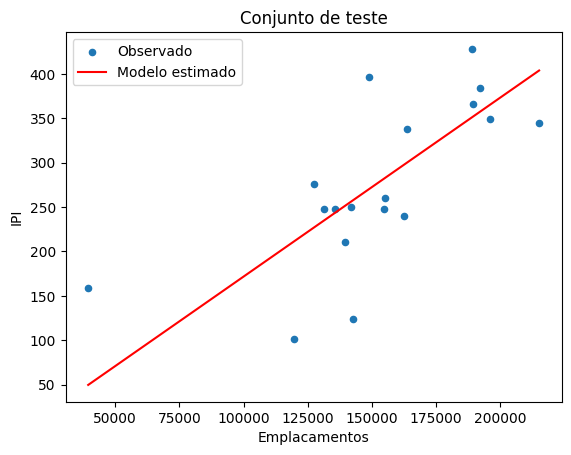

In [18]:
# Grafico de dispersao - conjunto de teste
teste.plot.scatter(x = 'emplacamentos', y = 'ipi', label='Observado')

# Desenhando a linha de previsao
x_prev = np.linspace(teste['emplacamentos'].min(),
                     teste['emplacamentos'].max(),
                     100).reshape(-1, 1)
y_prev = alfa + beta * x_prev
plt.plot(x_prev, y_prev, color='red', label='Modelo estimado')

# Rotulos e titulo
plt.xlabel("Emplacamentos")
plt.ylabel("IPI")
plt.title('Conjunto de teste')

# Legenda
plt.legend()

# Exibindo o grafico
plt.show()